<a href="https://colab.research.google.com/github/Jeevesh28/AmExpert-2021-PyCaret/blob/main/AmExpert-2021-PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
Competetion conducted by American Express on HackerEarth Platform.

[Credit Card Default Risk - AmExpert CodeLab](https://www.hackerearth.com/challenges/competitive/amexpert-code-lab/)

**Task:** We are given relevant information about the customers of a company. And we're required to build a Machine Learning Model that can predict if there will be Credit Card Defaulters.

**Dataset:**

| Column Name             | Description                                 |
| ----------------------- | ------------------------------------------- |
| customer_id             | unique identification of customer           |
| name                    | name of customer                            |
| age                     | age of customer (Years)                     |
| gender                  | gender of customer (M or F)                 |
| owns_car                | whether a customer owns a car (Y or N)      |
| owns_house              | whether a customer owns a house (Y or N)    |
| no_of_children          | number of children of a customer            |
| net_yearly_income       | net yearly income of a customer (USD)       |
| no_of_days_employed     | no. of days employed                        |
| occupation_type         | occupation type of customer                 |
| total_family_members    | no. of family members of customer           |
| migrant_worker          | customer is migrant worker (Yes or No)      |
| yearly_debt_payments    | yearly debt of customer (USD)               |
| credit_limit            | credit limit of customer (USD)              |
| credit_limit_used(%)    | credit limit used by customer               |
| credit_score            | credit score of customer                    |       
| prev_defaults           | no. of previous defaults                    |
| default_in_last_6months | whether a customer has defaulted (Yes or No)|
| **credit_card_default** | whether there will be credit card default (Yes or No) |

**Evaluation Metrics:** 
score: 100 * (metrics.f1_score(actual, predicted, average='macro'))

### **Importing Libraries:**

* **PyCaret:** PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows
* **Shap:** (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model

In [1]:
%%capture
!pip install pycaret[full] 
!pip install shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **Phik:** practical correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables
* **Networkx:** python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks

In [2]:
import phik
from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
import networkx as nx

### **Dataset Pre-processing:**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Competitions/AmEx/train.csv')
df.head()

customer_id            name  ...  default_in_last_6months credit_card_default
0  CST_115179        ita Bose  ...                        1                   1
1  CST_121920  Alper Jonathan  ...                        0                   0
2  CST_109330     Umesh Desai  ...                        0                   0
3  CST_128288             Rie  ...                        0                   0
4  CST_151355          McCool  ...                        0                   0

[5 rows x 19 columns]

In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Competitions/AmEx/test.csv')
df_test.head()

customer_id          name  ...  prev_defaults default_in_last_6months
0  CST_142525          Siva  ...              0                       0
1  CST_129215         Scott  ...              0                       0
2  CST_138443      Victoria  ...              2                       0
3  CST_123812  John McCrank  ...              0                       0
4  CST_144450      Martinne  ...              1                       1

[5 rows x 18 columns]

In [5]:
df.shape

(45528, 19)

* **Missing values:** visualization of number of missing values


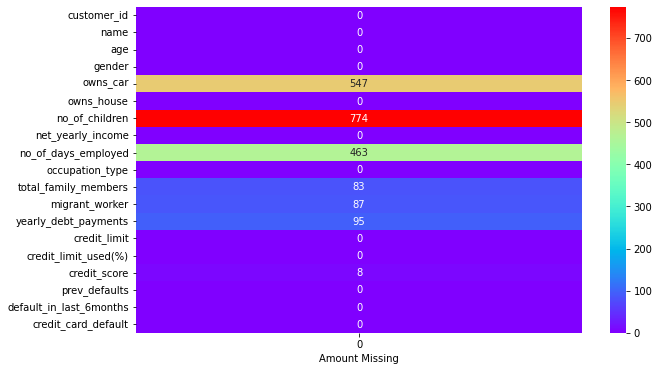

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.isnull().sum().to_frame(), annot=True, fmt = 'd', cmap = 'rainbow')
ax.set_xlabel('Amount Missing');

In [7]:
df.drop(['customer_id', 'name'], inplace = True, axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  object 
 2   owns_car                 44981 non-null  object 
 3   owns_house               45528 non-null  object 
 4   no_of_children           44754 non-null  float64
 5   net_yearly_income        45528 non-null  float64
 6   no_of_days_employed      45065 non-null  float64
 7   occupation_type          45528 non-null  object 
 8   total_family_members     45445 non-null  float64
 9   migrant_worker           45441 non-null  float64
 10  yearly_debt_payments     45433 non-null  float64
 11  credit_limit             45528 non-null  float64
 12  credit_limit_used(%)     45528 non-null  int64  
 13  credit_score             45520 non-null  float64
 14  prev_defaults         

* **Filling missing values**

In [9]:
values = {'owns_car': 'N', 'no_of_children': 0, 'migrant_worker': 0, 'total_family_members': 1, 'no_of_days_employed': 0, 
          'yearly_debt_payments': np.median(df.yearly_debt_payments.dropna()), 'credit_score': np.median(df.credit_score.dropna())}

In [10]:
df.fillna(value = values, inplace = True)

In [11]:
df_test.fillna(value = values, inplace = True)

* **Mean credit card default on basis of gender**

In [12]:
dfg = df.groupby(by=['gender']).mean()
dfg.loc[:, ['credit_card_default']]

credit_card_default
gender                     
F                  0.069867
M                  0.103019
XNA                0.000000

* **Mean credit card default on basis of occupation**

In [13]:
dfg = df.groupby(by=['occupation_type']).mean()
dfg.loc[:, ['credit_card_default']]

credit_card_default
occupation_type                           
Accountants                       0.052917
Cleaning staff                    0.103759
Cooking staff                     0.114191
Core staff                        0.059823
Drivers                           0.116855
HR staff                          0.089744
High skill tech staff             0.063615
IT staff                          0.030303
Laborers                          0.104623
Low-skill Laborers                0.157738
Managers                          0.067551
Medicine staff                    0.077647
Private service staff             0.074935
Realty agents                     0.099010
Sales staff                       0.096931
Secretaries                       0.040201
Security staff                    0.103415
Unknown                           0.064200
Waiters/barmen staff              0.103448

### **Visualizations and Feature Engineering:**

* **Percentage of defaulers vs non-dafaulters**

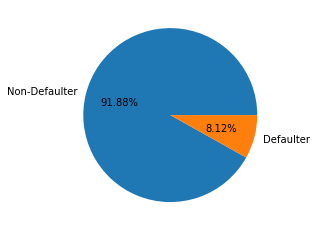

In [14]:
plt.pie(df['credit_card_default'].value_counts(), labels = ['Non-Defaulter', 'Defaulter'], autopct='%.2f%%');

* **Default on basis of gender**

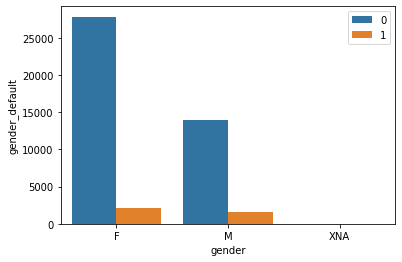

In [15]:
dfg = df.groupby(['gender','credit_card_default']).size().reset_index(name='gender_default')
sns.barplot(x='gender', y='gender_default', data=dfg, hue='credit_card_default')
plt.legend(loc='upper right');

* **Default on basis of occupation**

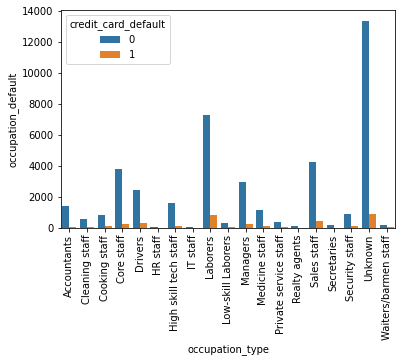

In [16]:
dfg = df.groupby(['occupation_type','credit_card_default']).size().reset_index(name='occupation_default')
ax = sns.barplot(x='occupation_type', y='occupation_default', data=dfg, hue='credit_card_default')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

* **Default on basis of credit limit used**

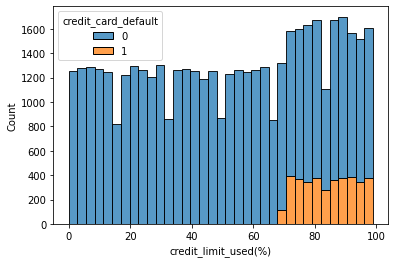

In [17]:
sns.histplot(data=df, x='credit_limit_used(%)', hue='credit_card_default', multiple='stack');

* **Default on basis of credit score**

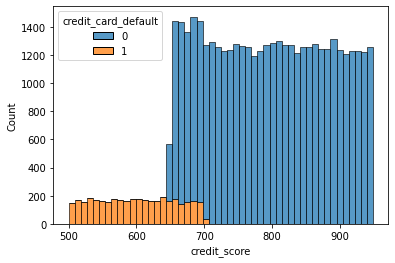

In [18]:
sns.histplot(data=df, x='credit_score', hue='credit_card_default', multiple='stack');

* **Default on basis of credit limit used**

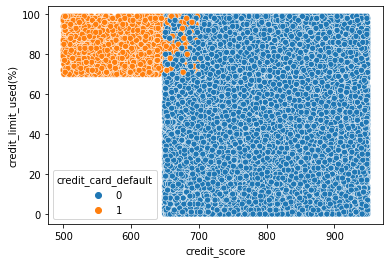

In [19]:
sns.scatterplot(data=df, x='credit_score', y='credit_limit_used(%)', hue='credit_card_default');

* **Default on basis of previous defaults**

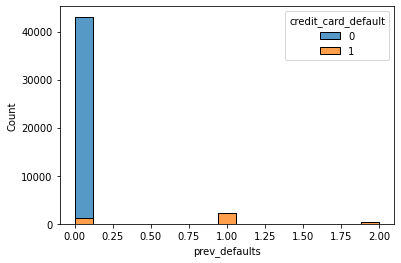

In [20]:
sns.histplot(data=df, x='prev_defaults', hue='credit_card_default', multiple='stack');

* **Default on basis of default in last 6 months**

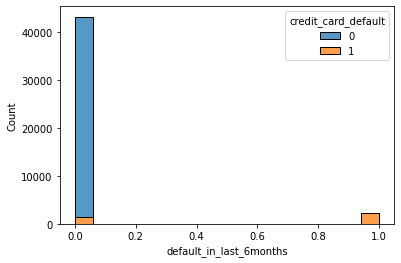

In [21]:
sns.histplot(data=df, x='default_in_last_6months', hue='credit_card_default', multiple='stack');

In [22]:
df[(df['credit_limit_used(%)'] > 70) & (df['credit_score'] < 700) & (df['credit_score'] > 150)]['credit_card_default'].value_counts()

1    3586
0    2065
Name: credit_card_default, dtype: int64

* **Creating new feature on basis of credit limit used and credit score** 

In [23]:
def func(row):
    if (row['credit_limit_used(%)'] >70) & (row['credit_score']<700):
        val = 1
    else:
        val = 0
    return val

df['default_chance'] = df.apply(func, axis=1) 
df_test['default_chance'] = df_test.apply(func, axis=1) 

* **Pairplot**

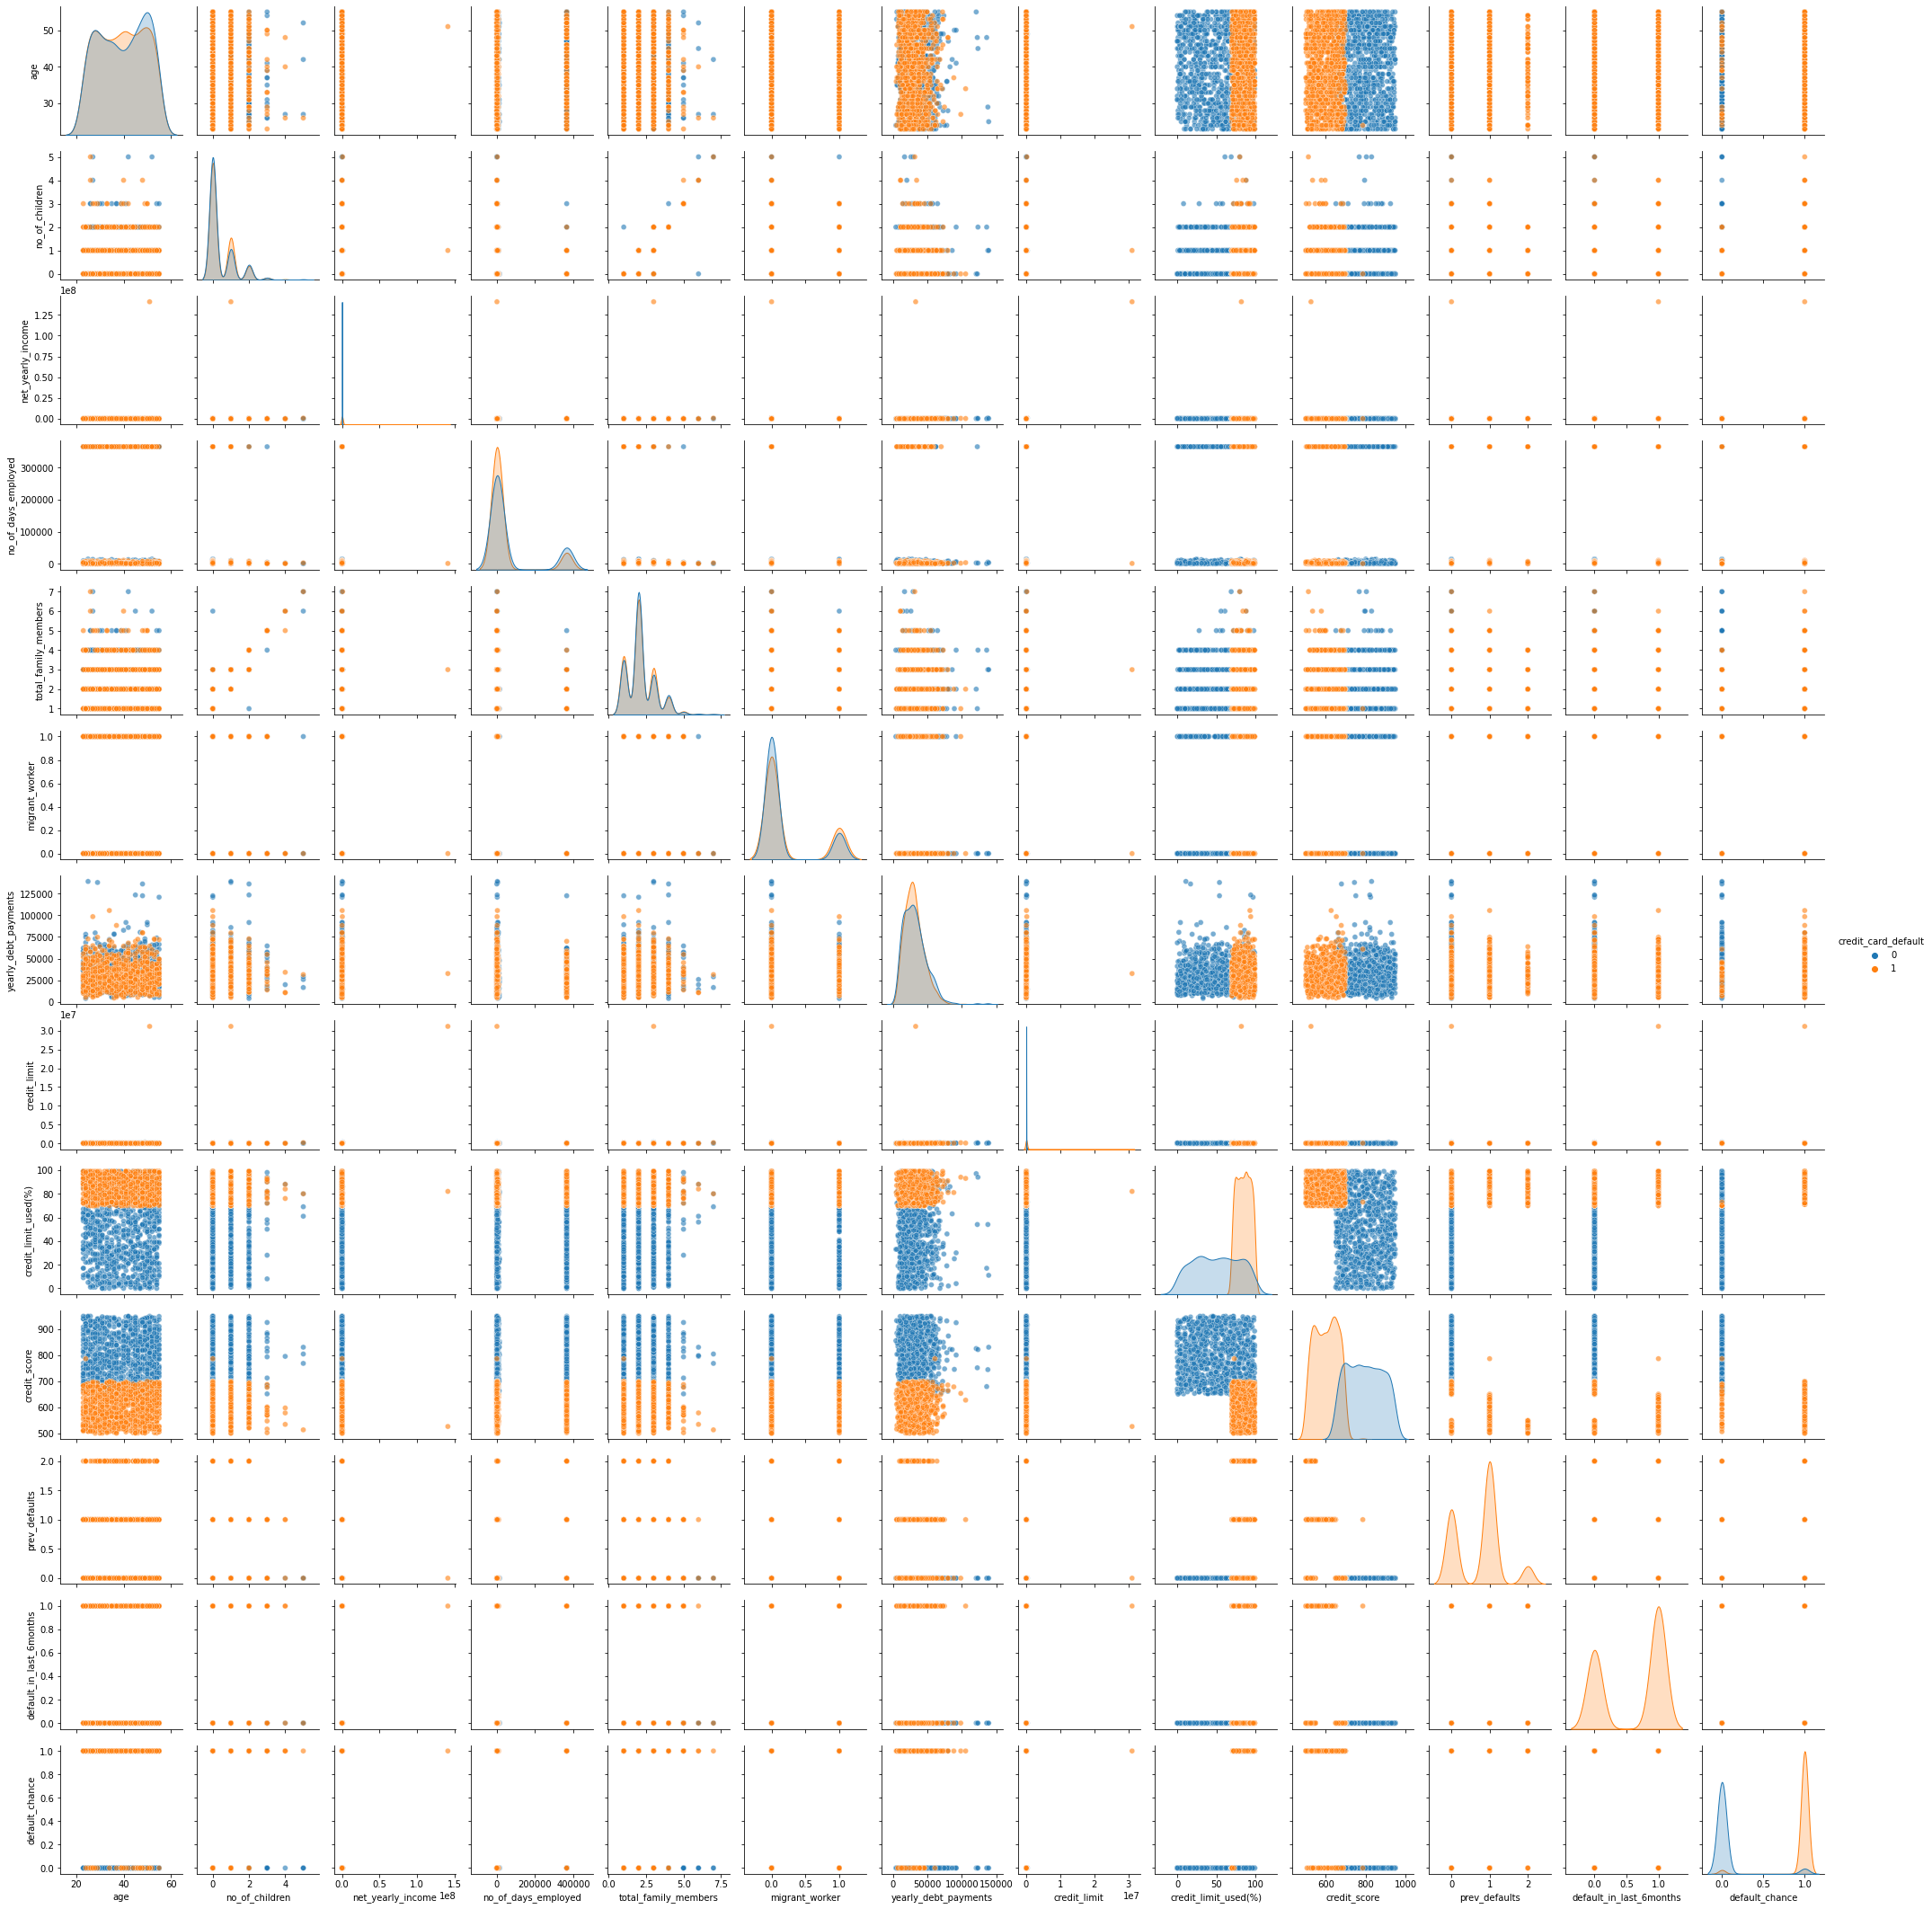

In [24]:
df_sample = df.groupby('credit_card_default', group_keys=False).apply(lambda x: x.sample(1000))
g = sns.pairplot(df_sample, hue='credit_card_default', plot_kws={'alpha':0.6})
g.fig.set_size_inches(30,30)

* **Phi_K correlation analyzer**

In [25]:
categorical = list(df.select_dtypes(include ='object').columns)

In [26]:
numerical = list(df.drop('credit_card_default', axis = 1).select_dtypes(include =['int64', 'float64']).columns)

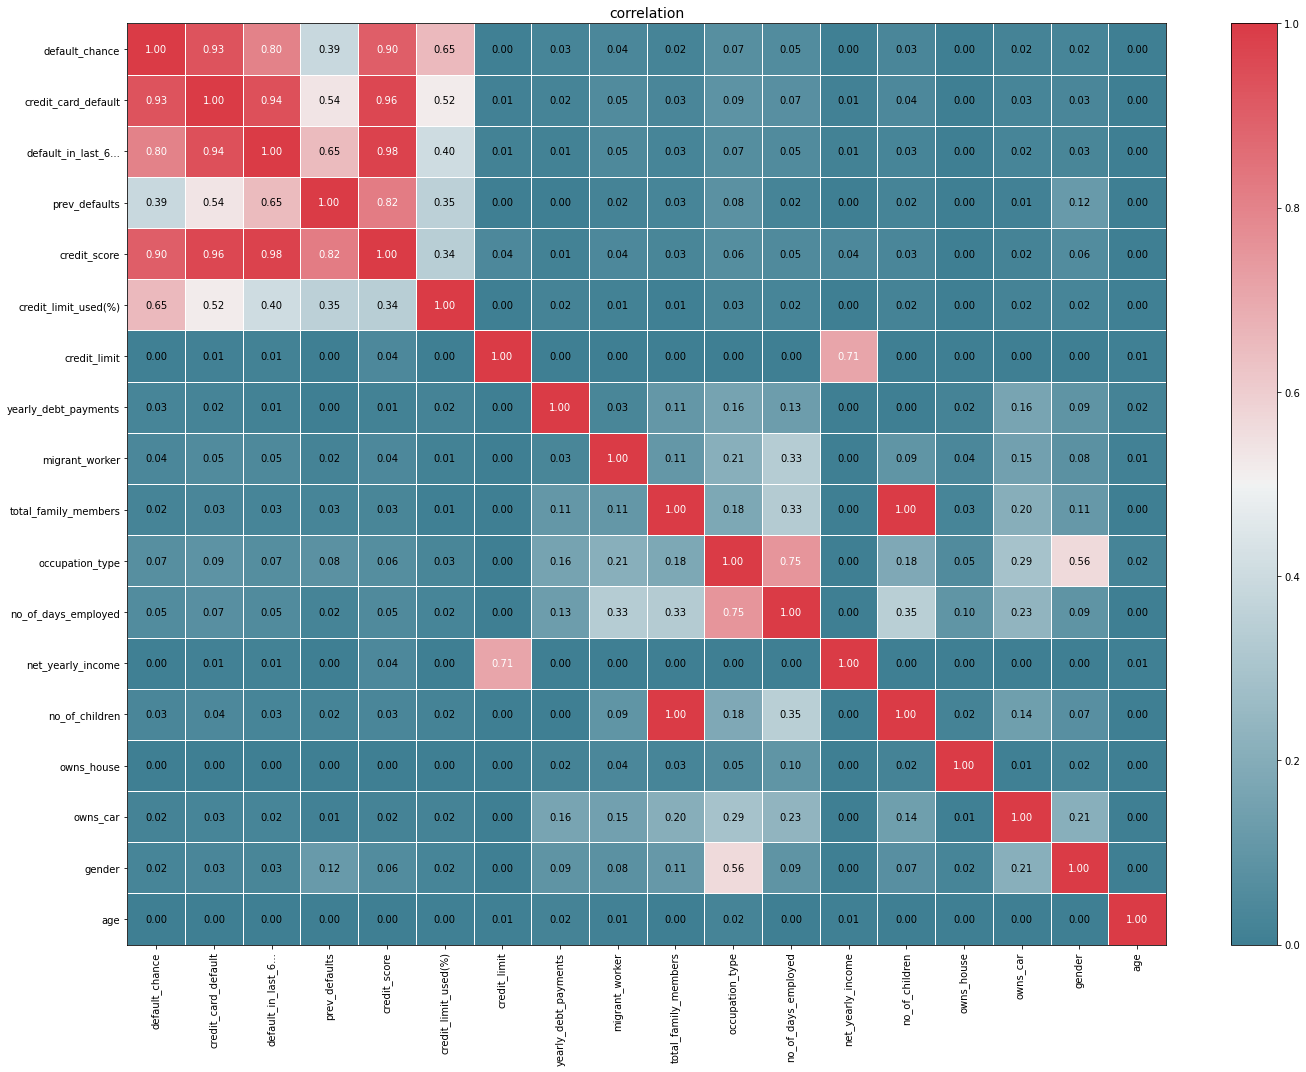

In [27]:
coerr_mat = df.phik_matrix(interval_cols = numerical + ['credit_card_default'])
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plot_correlation_matrix(coerr_mat.values, x_labels=coerr_mat.columns, y_labels=coerr_mat.index, 
                        vmin=0, vmax=1, color_map=cmap, figsize=(20, 15));

* **Correlation analyzer as Graph**

In [28]:
class GraphVisualization:
    def __init__(self):
        self.visual = []
      
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
    
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        for i in list(G.nodes()):
            G.nodes[i]['corr_target'] = coerr_mat['credit_card_default'][i]        
        node_color = [20 * nx.get_node_attributes(G, 'corr_target')[v] for v in G]
        nx.draw_shell(G, node_size=2750, node_color = node_color, alpha = 0.7, with_labels = True, edge_color ='0', cmap = cmap, font_size=9)
        plt.figure(figsize=(10, 10))
        plt.show()

In [29]:
G = GraphVisualization()
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and col1 != 'credit_card_default' and col2 != 'credit_card_default':
            if coerr_mat[col1][col2] > 0.75:
                G.addEdge(col1,col2) 

* Intensity of the node represents it's correlation with target variable. (Red node has more correlation with credit_card_default and blue node has less correlation with credit_card_default)
* Connected nodes have phi_k correlation greater than 0.75

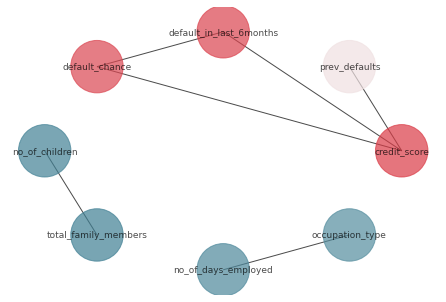

<Figure size 720x720 with 0 Axes>

In [30]:
G.visualize();

### **PyCaret (Auto-ML):**

* **Drop columns**

In [31]:
df.drop(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 
         'net_yearly_income', 'no_of_days_employed', 'occupation_type', 'total_family_members', 
         'migrant_worker', 'yearly_debt_payments', 'credit_score'], axis=1, inplace=True)

In [32]:
%%capture
from pycaret.classification import *
import pycaret.classification as pc

In [33]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


* **Setting up Environment:** to setup an experiment in PyCaret and get started with building classification models
* **Create Model:** to create a model, perform stratified cross validation and evaluate classification metrics
* **Tune Model:** to automatically tune the hyper-parameters of a classification model
* **Plot Model:** to analyze model performance using various plots
* **Save / Load Model:** to save / load a model for future use
* **Finalize Model:** to finalize the best model at the end of the experiment
* **Predict Model:** to make predictions on new / unseen data

**Setting up Environment**

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.

In [34]:
set = pc.setup(data = df, target = 'credit_card_default');

Description                Value
0                               session_id                 3368
1                                   Target  credit_card_default
2                              Target Type               Binary
3                            Label Encoded                 None
4                            Original Data           (45528, 6)
5                           Missing Values                False
6                         Numeric Features                    2
7                     Categorical Features                    3
8                         Ordinal Features                False
9                High Cardinality Features                False
10                 High Cardinality Method                 None
11                   Transformed Train Set           (31869, 7)
12                    Transformed Test Set           (13659, 7)
13                      Shuffle Train-Test                 True
14                     Stratify Train-Test                False
15                          Fold Generator      StratifiedKFold
16                             Fold Number                   10
17                                CPU Jobs                   -1
18                                 Use GPU                False
19                          Log Experiment                False
20                         Experiment Name     clf-default-name
21                                     USI                 3c70
22                         Imputation Type               simple
23          Iterative Imputation Iteration                 None
24                         Numeric Imputer                 mean
25      Iterative Imputation Numeric Model                 None
26                     Categorical Imputer             constant
27  Iterative Imputation Categorical Model                 None
28           Unknown Categoricals Handling       least_frequent
29                               Normalize                False
30                        Normalize Method                 None
31                          Transformation                False
32                   Transformation Method                 None
33                                     PCA                False
34                              PCA Method                 None
35                          PCA Components                 None
36                     Ignore Low Variance                False
37                     Combine Rare Levels                False
38                    Rare Level Threshold                 None
39                         Numeric Binning                False
40                         Remove Outliers                False
41                      Outliers Threshold                 None
42                Remove Multicollinearity                False
43             Multicollinearity Threshold                 None
44             Remove Perfect Collinearity                 True
45                              Clustering                False
46                    Clustering Iteration                 None
47                     Polynomial Features                False
48                       Polynomial Degree                 None
49                    Trignometry Features                False
50                    Polynomial Threshold                 None
51                          Group Features                False
52                       Feature Selection                False
53                Feature Selection Method              classic
54            Features Selection Threshold                 None
55                     Feature Interaction                False
56                           Feature Ratio                False
57                   Interaction Threshold                 None
58                           Fix Imbalance                False
59                    Fix Imbalance Method                SMOTE

**Comparing All Models**

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed. This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [35]:
pc.compare_models();

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.9764  0.9923  0.7124  0.9941   
ridge                    Ridge Classifier    0.9763  0.0000  0.7062  1.0000   
lda          Linear Discriminant Analysis    0.9763  0.9895  0.7062  1.0000   
gbc          Gradient Boosting Classifier    0.9762  0.9927  0.7116  0.9914   
lightgbm  Light Gradient Boosting Machine    0.9739  0.9922  0.7431  0.9185   
catboost              CatBoost Classifier    0.9737  0.9925  0.7431  0.9164   
xgboost         Extreme Gradient Boosting    0.9729  0.9923  0.7509  0.8974   
rf               Random Forest Classifier    0.9681  0.9876  0.7870  0.8128   
et                 Extra Trees Classifier    0.9679  0.9664  0.7909  0.8081   
dt               Decision Tree Classifier    0.9675  0.8909  0.7995  0.7994   
lr                    Logistic Regression    0.9512  0.7456  0.4365  0.5486   
qda       Quadratic Discriminant Analysis    0.9193  0.0000  0.0000  0.0000   
dummy                    Dummy Classifier    0.9193  0.5000  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.9184  0.0000  0.0082  0.0717   
nb                            Naive Bayes    0.9181  0.8634  0.0622  0.2223   
knn                K Neighbors Classifier    0.9075  0.6969  0.0470  0.1948   

              F1   Kappa     MCC  TT (Sec)  
ada       0.8297  0.8174  0.8307     0.655  
ridge     0.8275  0.8152  0.8296     0.033  
lda       0.8275  0.8152  0.8296     0.061  
gbc       0.8282  0.8158  0.8289     1.705  
lightgbm  0.8211  0.8072  0.8127     0.300  
catboost  0.8203  0.8063  0.8117    10.359  
xgboost   0.8172  0.8027  0.8067     5.410  
rf        0.7992  0.7819  0.7823     1.403  
et        0.7990  0.7815  0.7819     0.981  
dt        0.7990  0.7813  0.7816     0.051  
lr        0.4859  0.4772  0.4809     0.473  
qda       0.0000  0.0000  0.0000     0.042  
dummy     0.0000  0.0000  0.0000     0.023  
svm       0.0141  0.0105  0.0169     0.081  
nb        0.0890  0.0742  0.0859     0.034  
knn       0.0756  0.0459  0.0591     0.279

### **1. Random Forest:**

In [36]:
rf_model = pc.create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9677  0.9888  0.7588  0.8263  0.7911  0.7736  0.7744
1       0.9664  0.9799  0.7393  0.8261  0.7803  0.7622  0.7635
2       0.9714  0.9920  0.8327  0.8168  0.8247  0.8091  0.8092
3       0.9696  0.9890  0.8210  0.8053  0.8131  0.7965  0.7966
4       0.9664  0.9851  0.8016  0.7863  0.7938  0.7756  0.7756
5       0.9696  0.9873  0.7899  0.8252  0.8072  0.7906  0.7909
6       0.9655  0.9823  0.7946  0.7824  0.7885  0.7697  0.7697
7       0.9714  0.9908  0.8178  0.8275  0.8226  0.8071  0.8071
8       0.9677  0.9902  0.7674  0.8216  0.7936  0.7761  0.7766
9       0.9655  0.9909  0.7471  0.8101  0.7773  0.7586  0.7594
Mean    0.9681  0.9876  0.7870  0.8128  0.7992  0.7819  0.7823
SD      0.0022  0.0038  0.0309  0.0158  0.0159  0.0170  0.0167

**Tune Model:**

When a model is created using the `create_model()` function it uses the default hyperparameters. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

In [37]:
tuned_rf = pc.tune_model(rf_model)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       0.9755  0.9911  0.6965    1.0  0.8211  0.8084  0.8237
1       0.9736  0.9893  0.6732    1.0  0.8047  0.7911  0.8089
2       0.9799  0.9932  0.7510    1.0  0.8578  0.8472  0.8573
3       0.9780  0.9907  0.7276    1.0  0.8423  0.8309  0.8430
4       0.9787  0.9910  0.7354    1.0  0.8475  0.8363  0.8478
5       0.9749  0.9909  0.6887    1.0  0.8157  0.8027  0.8188
6       0.9758  0.9901  0.7016    1.0  0.8246  0.8121  0.8268
7       0.9780  0.9905  0.7287    1.0  0.8430  0.8316  0.8436
8       0.9752  0.9912  0.6938    1.0  0.8192  0.8064  0.8219
9       0.9739  0.9918  0.6770    1.0  0.8074  0.7940  0.8114
Mean    0.9764  0.9910  0.7073    1.0  0.8283  0.8161  0.8303
SD      0.0020  0.0010  0.0252    0.0  0.0172  0.0182  0.0156

In [38]:
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3368, verbose=0,
                       warm_start=False)


In [39]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=3368, verbose=0,
                       warm_start=False)


In [40]:
tuned_rf_optimized = pc.tune_model(rf_model, optimize = 'F1')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       0.9755  0.9911  0.6965    1.0  0.8211  0.8084  0.8237
1       0.9736  0.9893  0.6732    1.0  0.8047  0.7911  0.8089
2       0.9799  0.9932  0.7510    1.0  0.8578  0.8472  0.8573
3       0.9780  0.9907  0.7276    1.0  0.8423  0.8309  0.8430
4       0.9787  0.9910  0.7354    1.0  0.8475  0.8363  0.8478
5       0.9749  0.9909  0.6887    1.0  0.8157  0.8027  0.8188
6       0.9758  0.9901  0.7016    1.0  0.8246  0.8121  0.8268
7       0.9780  0.9905  0.7287    1.0  0.8430  0.8316  0.8436
8       0.9752  0.9912  0.6938    1.0  0.8192  0.8064  0.8219
9       0.9739  0.9918  0.6770    1.0  0.8074  0.7940  0.8114
Mean    0.9764  0.9910  0.7073    1.0  0.8283  0.8161  0.8303
SD      0.0020  0.0010  0.0252    0.0  0.0172  0.0182  0.0156

In [41]:
print(tuned_rf_optimized)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=3368, verbose=0,
                       warm_start=False)


In [42]:
pc.evaluate_model(tuned_rf_optimized)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Plot Model**

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

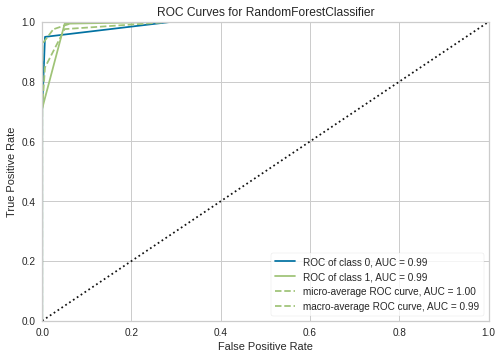

In [43]:
pc.plot_model(tuned_rf_optimized)

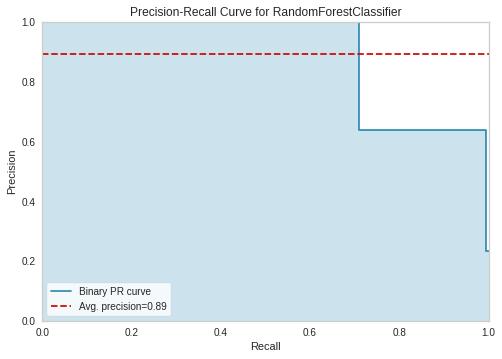

In [44]:
plot_model(tuned_rf_optimized, plot = 'pr')

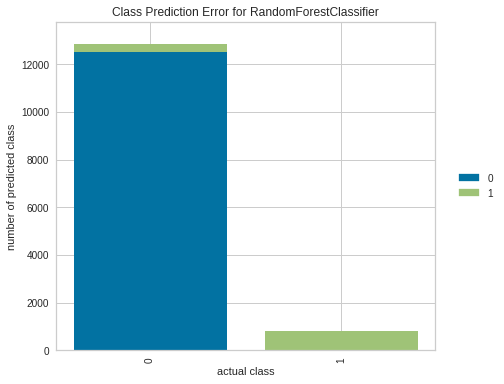

In [45]:
pc.plot_model(tuned_rf_optimized,plot = 'error')

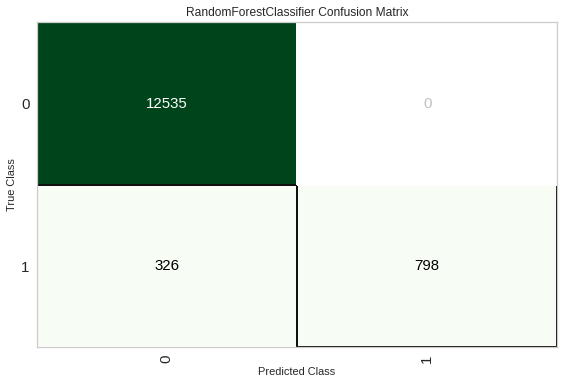

In [46]:
pc.plot_model(tuned_rf_optimized,plot = 'confusion_matrix')

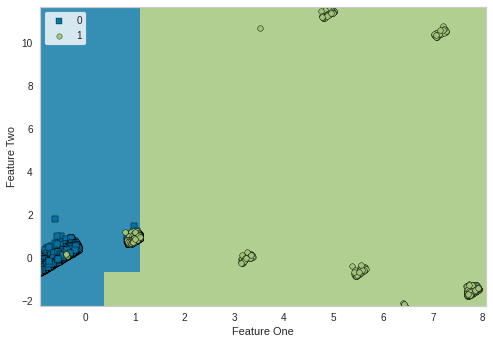

In [47]:
plot_model(tuned_rf_optimized, plot = 'boundary')

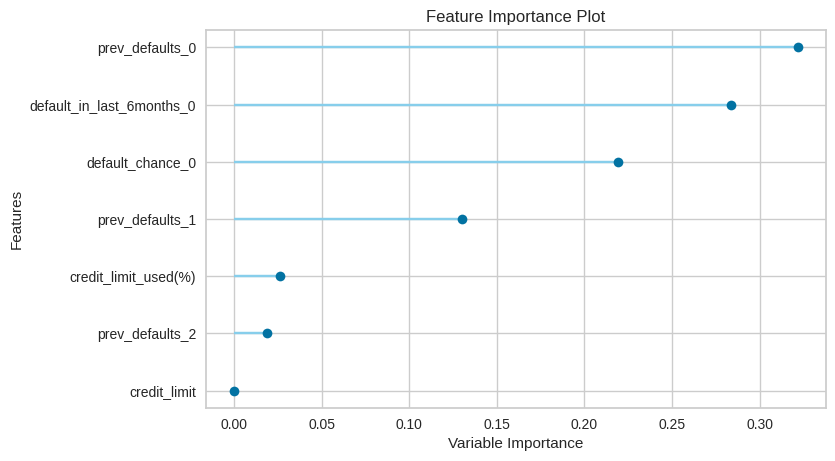

In [48]:
pc.plot_model(tuned_rf_optimized,plot = 'feature')

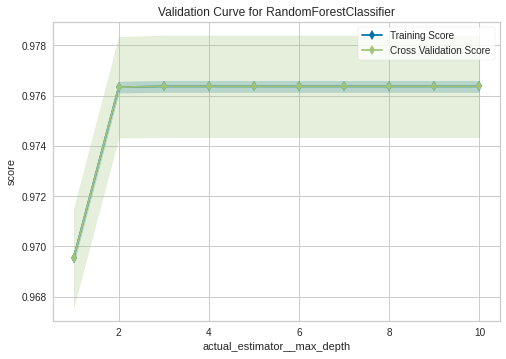

In [49]:
pc.plot_model(tuned_rf_optimized,plot = 'vc')

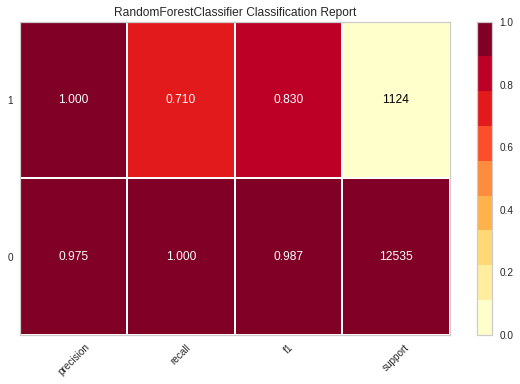

In [50]:
plot_model(tuned_rf_optimized, plot = 'class_report')

**Save Model:**

We have now finished the experiment by finalizing the `tuned_rf_optimized` model which is now stored in `tuned_rf_optimized` variable. We have also used the model stored in `tuned_rf_optimized` to predict `test`.

In [ ]:
pc.save_model(tuned_rf_optimized, 'tuned_rf_optimized')

**Load Model:**

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [52]:
loaded_model = pc.load_model('tuned_rf_optimized')

Transformation Pipeline and Model Successfully Loaded


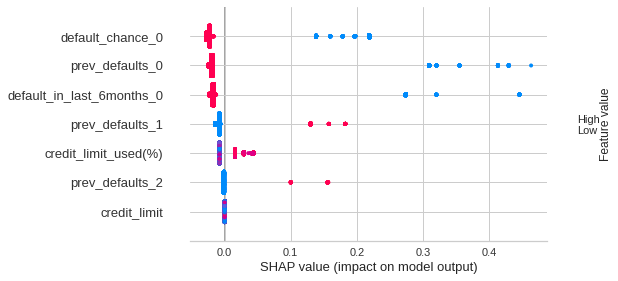

In [53]:
pc.interpret_model(tuned_rf_optimized)

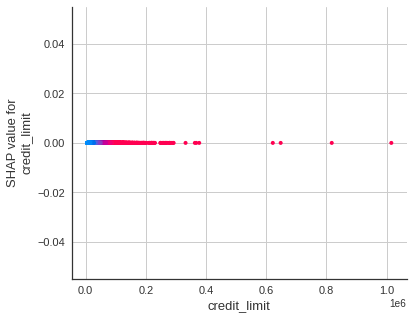

In [54]:
pc.interpret_model(tuned_rf_optimized, plot = 'correlation')

**Finalize Model**

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [55]:
pc.finalize_model(tuned_rf_optimized)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=3368, verbose=0,
                       warm_start=False)

**Predict Model**

The `predict_model()` function is also used to predict on the unseen dataset.

In [56]:
prediction = pc.predict_model(tuned_rf_optimized, data = df_test)

In [57]:
prediction['Label'].value_counts()

0    10766
1      617
Name: Label, dtype: int64

In [58]:
prediction = prediction[['customer_id', 'Label']]
prediction.rename(columns={'Label': 'credit_card_default'}, inplace=True)
prediction.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

**Submission**

In [59]:
prediction.to_csv('submission_rf.csv', index = False)

### **2. XG Boost:**

In [60]:
xgb_model = pc.create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9724  0.9936  0.7432  0.8967  0.8128  0.7980  0.8021
1       0.9714  0.9909  0.7160  0.9109  0.8017  0.7866  0.7932
2       0.9752  0.9940  0.8054  0.8771  0.8398  0.8263  0.8272
3       0.9755  0.9925  0.7665  0.9163  0.8347  0.8216  0.8255
4       0.9730  0.9909  0.7665  0.8834  0.8208  0.8063  0.8087
5       0.9705  0.9926  0.7160  0.8976  0.7965  0.7809  0.7867
6       0.9746  0.9924  0.7519  0.9194  0.8273  0.8137  0.8185
7       0.9724  0.9926  0.7636  0.8795  0.8174  0.8026  0.8049
8       0.9743  0.9922  0.7558  0.9112  0.8263  0.8125  0.8167
9       0.9699  0.9916  0.7237  0.8815  0.7949  0.7788  0.7832
Mean    0.9729  0.9923  0.7509  0.8974  0.8172  0.8027  0.8067
SD      0.0019  0.0010  0.0262  0.0155  0.0148  0.0157  0.0148

**Tune Model:**


In [61]:
tuned_xgb = pc.tune_model(xgb_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9758  0.9945  0.7160  0.9787  0.8270  0.8143  0.8258
1       0.9714  0.9907  0.6809  0.9511  0.7937  0.7788  0.7913
2       0.9780  0.9932  0.7782  0.9390  0.8511  0.8393  0.8436
3       0.9768  0.9924  0.7432  0.9598  0.8377  0.8254  0.8333
4       0.9783  0.9922  0.7549  0.9700  0.8490  0.8375  0.8452
5       0.9758  0.9933  0.7082  0.9891  0.8254  0.8128  0.8259
6       0.9736  0.9924  0.7093  0.9531  0.8133  0.7995  0.8096
7       0.9746  0.9930  0.7287  0.9447  0.8228  0.8093  0.8172
8       0.9749  0.9926  0.7054  0.9785  0.8198  0.8067  0.8192
9       0.9743  0.9925  0.6887  0.9888  0.8119  0.7986  0.8137
Mean    0.9754  0.9927  0.7213  0.9653  0.8252  0.8122  0.8225
SD      0.0020  0.0009  0.0286  0.0173  0.0166  0.0175  0.0153

In [62]:
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=3368, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [63]:
print(tuned_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=3368,
              reg_alpha=1, reg_lambda=0.7, scale_pos_weight=4.5, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [64]:
tuned_xgb_optimized = pc.tune_model(xgb_model, optimize = 'F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9758  0.9945  0.7160  0.9787  0.8270  0.8143  0.8258
1       0.9714  0.9907  0.6809  0.9511  0.7937  0.7788  0.7913
2       0.9780  0.9932  0.7782  0.9390  0.8511  0.8393  0.8436
3       0.9768  0.9924  0.7432  0.9598  0.8377  0.8254  0.8333
4       0.9783  0.9922  0.7549  0.9700  0.8490  0.8375  0.8452
5       0.9758  0.9933  0.7082  0.9891  0.8254  0.8128  0.8259
6       0.9736  0.9924  0.7093  0.9531  0.8133  0.7995  0.8096
7       0.9746  0.9930  0.7287  0.9447  0.8228  0.8093  0.8172
8       0.9749  0.9926  0.7054  0.9785  0.8198  0.8067  0.8192
9       0.9743  0.9925  0.6887  0.9888  0.8119  0.7986  0.8137
Mean    0.9754  0.9927  0.7213  0.9653  0.8252  0.8122  0.8225
SD      0.0020  0.0009  0.0286  0.0173  0.0166  0.0175  0.0153

In [65]:
print(tuned_xgb_optimized)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=3368,
              reg_alpha=1, reg_lambda=0.7, scale_pos_weight=4.5, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [66]:
pc.evaluate_model(tuned_xgb_optimized)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Plot Model**


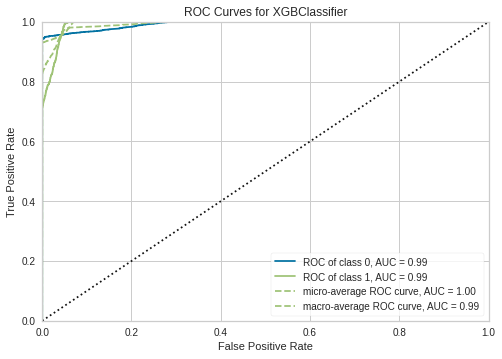

In [67]:
pc.plot_model(tuned_xgb_optimized)

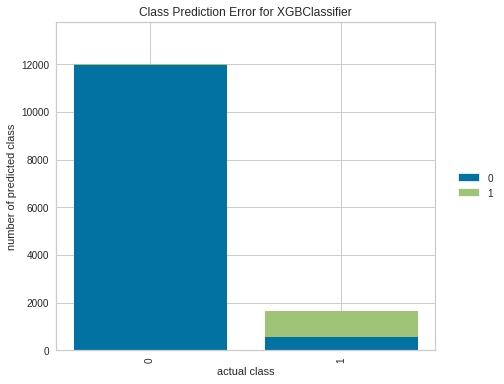

In [68]:
pc.plot_model(tuned_xgb_optimized, plot = 'error')

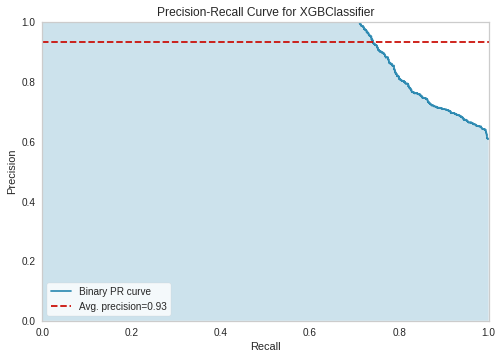

In [69]:
plot_model(tuned_xgb_optimized, plot = 'pr')

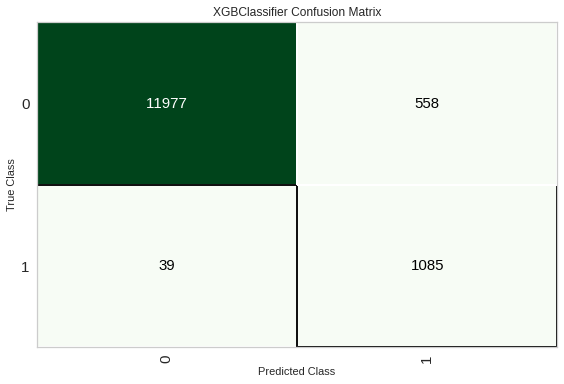

In [70]:
pc.plot_model(tuned_xgb_optimized, plot = 'confusion_matrix')

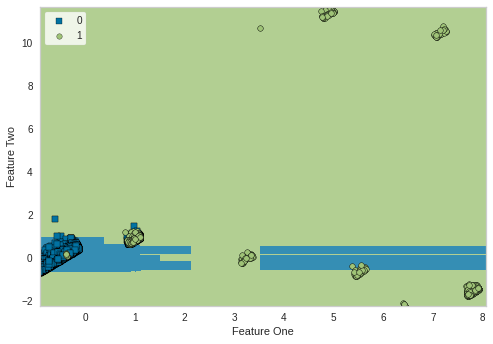

In [71]:
plot_model(tuned_xgb_optimized, plot = 'boundary')

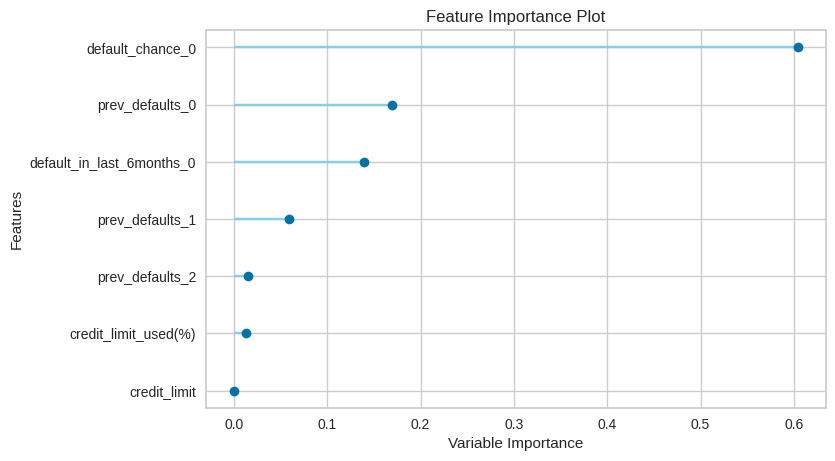

In [72]:
pc.plot_model(tuned_xgb_optimized, plot = 'feature')

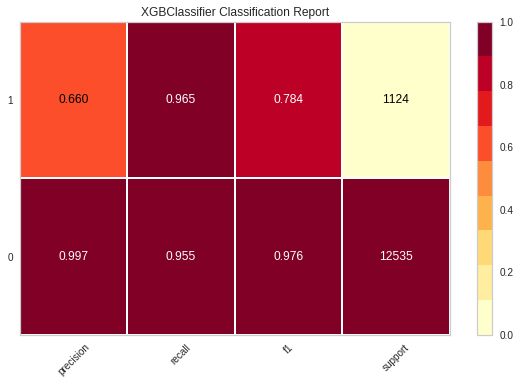

In [73]:
plot_model(tuned_xgb_optimized, plot = 'class_report')

**Save Model:**


In [ ]:
pc.save_model(tuned_xgb_optimized, 'tuned_xgb_optimized')

In [75]:
loaded_model = pc.load_model('tuned_xgb_optimized')

Transformation Pipeline and Model Successfully Loaded


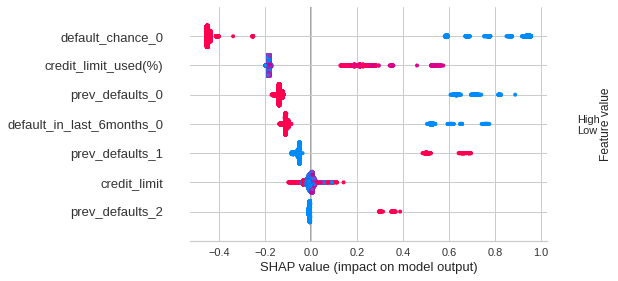

In [76]:
pc.interpret_model(tuned_xgb_optimized)

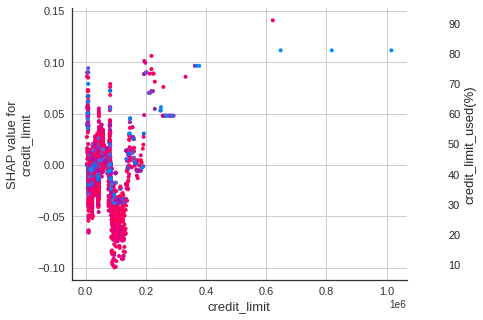

In [77]:
pc.interpret_model(tuned_xgb_optimized, plot = 'correlation')

**Finalize Model**


In [78]:
pc.finalize_model(tuned_xgb_optimized)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=3368,
              reg_alpha=1, reg_lambda=0.7, scale_pos_weight=4.5, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

**Predict Model**

In [79]:
prediction = pc.predict_model(tuned_xgb_optimized, data = df_test)

In [80]:
prediction = prediction[['customer_id', 'Label']]
prediction.rename(columns={'Label': 'credit_card_default'}, inplace=True)
prediction.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

**Submission**

In [81]:
prediction.to_csv('submission_xgb.csv', index = False)

### **3. Blend Model:**

This function creates a Soft Voting / Majority Rule classifier for all the estimators in the model library (excluding the few when turbo is True) or for specific trained estimators passed as a list in estimator_list param. It scores it using Stratified Cross Validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold (default CV = 10 Folds). This function returns a trained model object.

In [82]:
blend_specific = blend_models(estimator_list = [tuned_xgb_optimized, tuned_rf_optimized], method = 'soft', optimize = 'F1')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       0.9755  0.9945  0.6965    1.0  0.8211  0.8084  0.8237
1       0.9736  0.9907  0.6732    1.0  0.8047  0.7911  0.8089
2       0.9799  0.9932  0.7510    1.0  0.8578  0.8472  0.8573
3       0.9780  0.9924  0.7276    1.0  0.8423  0.8309  0.8430
4       0.9787  0.9922  0.7354    1.0  0.8475  0.8363  0.8478
5       0.9749  0.9933  0.6887    1.0  0.8157  0.8027  0.8188
6       0.9758  0.9924  0.7016    1.0  0.8246  0.8121  0.8268
7       0.9780  0.9932  0.7287    1.0  0.8430  0.8316  0.8436
8       0.9752  0.9926  0.6938    1.0  0.8192  0.8064  0.8219
9       0.9739  0.9925  0.6770    1.0  0.8074  0.7940  0.8114
Mean    0.9764  0.9927  0.7073    1.0  0.8283  0.8161  0.8303
SD      0.0020  0.0009  0.0252    0.0  0.0172  0.0182  0.0156

In [83]:
pc.evaluate_model(blend_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Plot Model**

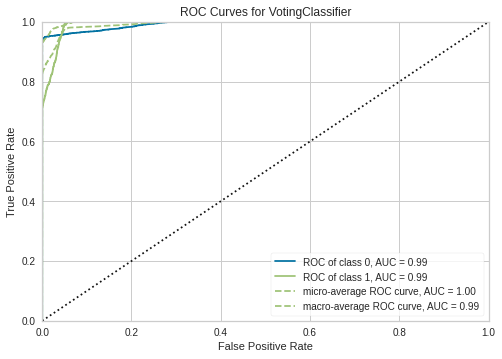

In [84]:
pc.plot_model(blend_specific)

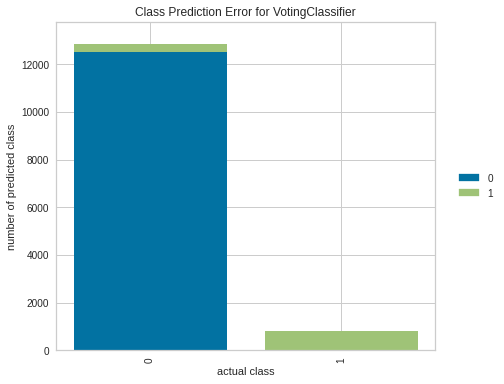

In [85]:
pc.plot_model(blend_specific,plot = 'error')

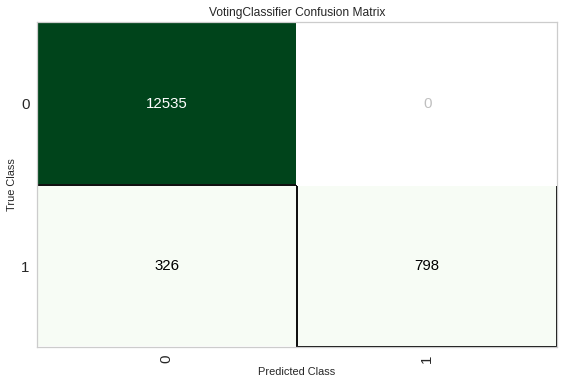

In [86]:
pc.plot_model(blend_specific,plot = 'confusion_matrix')

**Save Model:**


In [ ]:
pc.save_model(blend_specific, 'blend_specific')

**Load Model:**


In [88]:
loaded_model = pc.load_model('blend_specific')

Transformation Pipeline and Model Successfully Loaded


**Finalize Model**

In [ ]:
pc.finalize_model(blend_specific)

**Predict Model**

In [90]:
prediction = pc.predict_model(blend_specific, data = df_test)

In [91]:
prediction['Label'].value_counts()

0    10766
1      617
Name: Label, dtype: int64

In [92]:
prediction = prediction[['customer_id', 'Label']]
prediction.rename(columns={'Label': 'credit_card_default'}, inplace=True)
prediction.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

**Submission**

In [93]:
prediction.to_csv('submission_blend.csv', index = False)

### **4. Stacked Model:**

This function creates a meta model and scores it using Stratified Cross Validation. The predictions from the base level models as passed in the estimator_list param  are used as input features for the meta model. The restacking parameter controls the ability to expose raw features to the meta model when set to True (default = False). The output prints the score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold (default = 10 Folds).

In [94]:
stacked_models = stack_models(estimator_list = [tuned_xgb_optimized, tuned_rf_optimized], optimize = 'F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9194  0.3976  0.0000  0.0000  0.0000  0.0000  0.0000
1       0.9718  0.9861  0.6809  0.9563  0.7955  0.7807  0.7938
2       0.9194  0.3401  0.0000  0.0000  0.0000  0.0000  0.0000
3       0.9194  0.3802  0.0000  0.0000  0.0000  0.0000  0.0000
4       0.9194  0.4068  0.0000  0.0000  0.0000  0.0000  0.0000
5       0.9740  0.9892  0.7004  0.9677  0.8126  0.7990  0.8111
6       0.9743  0.9875  0.7248  0.9444  0.8202  0.8066  0.8148
7       0.9746  0.9881  0.7519  0.9194  0.8273  0.8137  0.8185
8       0.9743  0.9901  0.7093  0.9632  0.8170  0.8035  0.8144
9       0.9193  0.3921  0.0000  0.0000  0.0000  0.0000  0.0000
Mean    0.9466  0.6858  0.3567  0.4751  0.4073  0.4004  0.4053
SD      0.0272  0.3029  0.3571  0.4753  0.4073  0.4004  0.4053

In [95]:
pc.evaluate_model(stacked_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Plot Model**

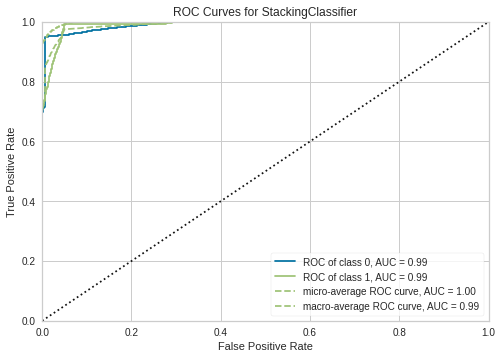

In [96]:
pc.plot_model(stacked_models)

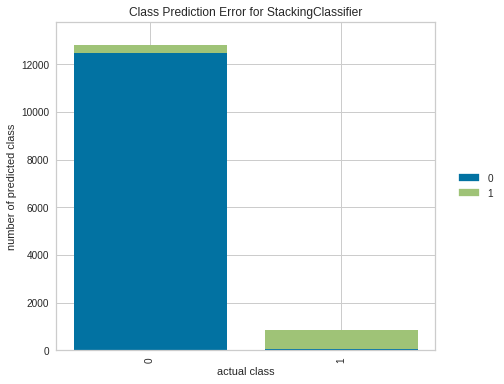

In [97]:
pc.plot_model(stacked_models,plot = 'error')

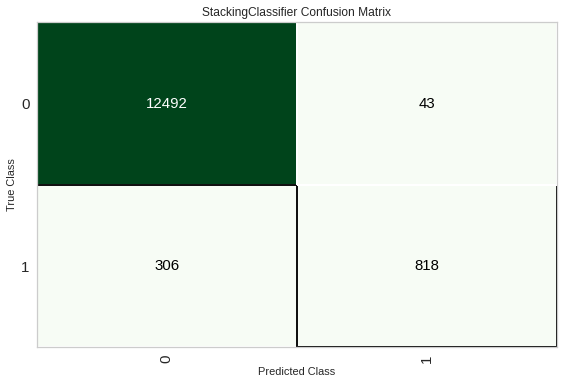

In [98]:
pc.plot_model(stacked_models,plot = 'confusion_matrix')

**Save Model:**

In [ ]:
pc.save_model(blend_specific, 'stacked_models')

**Load Model:**

In [100]:
loaded_model = pc.load_model('stacked_models')

Transformation Pipeline and Model Successfully Loaded


**Finalize Model**

In [ ]:
pc.finalize_model(stacked_models)

**Predict Model**


In [102]:
prediction = pc.predict_model(stacked_models, data = df_test)

In [103]:
prediction['Label'].value_counts()

0    10706
1      677
Name: Label, dtype: int64

In [104]:
prediction = prediction[['customer_id', 'Label']]
prediction.rename(columns={'Label': 'credit_card_default'}, inplace=True)
prediction.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

**Submission**


In [105]:
prediction.to_csv('submission_stack.csv', index = False)